### Importing Libraries

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing 
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

### Loading the Weather Data File

In [2]:
df = pd.read_csv("E:\FALL-2023\DATA MINING\FINAL PROJECT\IndianWeatherRepository.csv")

In [4]:
df.head()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,time,temperature_celsius,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Mahamaya,West Bengal,22.07,88.44,Asia/Kolkata,1697749200,20-Oct,02:30:00,23.3,...,1374.8,1498.0,6,10,5:34 AM,5:09 PM,9:41 AM,8:27 PM,Waxing Crescent,18
1,India,Mahamaya,West Bengal,22.07,88.44,Asia/Kolkata,1697662800,19-Oct,02:30:00,26.0,...,1282.6,1422.5,6,10,5:34 AM,5:09 PM,8:39 AM,7:35 PM,Waxing Crescent,11
2,India,Mahamaya,West Bengal,22.07,88.44,Asia/Kolkata,1697145300,13-Oct,02:45:00,25.3,...,992.8,1159.5,6,10,5:31 AM,5:15 PM,3:19 AM,4:00 PM,Waning Crescent,7
3,India,Bishnupur,West Bengal,22.38,88.27,Asia/Kolkata,1698093900,24-Oct,02:15:00,25.0,...,932.0,1082.4,6,10,5:37 AM,5:06 PM,1:25 PM,No moonset,Waxing Gibbous,60
4,India,Kolkata,West Bengal,22.57,88.37,Asia/Kolkata,1698093900,24-Oct,02:15:00,25.0,...,932.0,1082.4,6,10,5:36 AM,5:05 PM,1:25 PM,No moonset,Waxing Gibbous,60


### Finding the data type of each column in the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33369 entries, 0 to 33368
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       33369 non-null  object 
 1   location_name                 33369 non-null  object 
 2   region                        33369 non-null  object 
 3   latitude                      33369 non-null  float64
 4   longitude                     33369 non-null  float64
 5   timezone                      33369 non-null  object 
 6   last_updated_epoch            33369 non-null  int64  
 7   last_updated                  33369 non-null  object 
 8   time                          33369 non-null  object 
 9   temperature_celsius           33369 non-null  float64
 10  temperature_fahrenheit        33369 non-null  float64
 11  condition_text                33369 non-null  object 
 12  wind_mph                      33369 non-null  float64
 13  w

### Dropping the columns which are not required for our analysis
##### The below columns are being dropped beacuse these columns are representing the same data in two different units and few columns are not relevent for the analysis

In [6]:
my_df = df.drop(['country','location_name','timezone','last_updated_epoch','temperature_fahrenheit','wind_mph',
            'pressure_in','precip_in','visibility_miles','gust_mph','air_quality_us-epa-index','air_quality_gb-defra-index',
            'sunrise','sunset','moonrise','moonset','moon_illumination','feels_like_fahrenheit'],axis=1)

In [7]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33369 entries, 0 to 33368
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   region                        33369 non-null  object 
 1   latitude                      33369 non-null  float64
 2   longitude                     33369 non-null  float64
 3   last_updated                  33369 non-null  object 
 4   time                          33369 non-null  object 
 5   temperature_celsius           33369 non-null  float64
 6   condition_text                33369 non-null  object 
 7   wind_kph                      33369 non-null  float64
 8   wind_degree                   33369 non-null  int64  
 9   wind_direction                33369 non-null  object 
 10  pressure_mb                   33369 non-null  int64  
 11  precip_mm                     33369 non-null  float64
 12  humidity                      33369 non-null  int64  
 13  c

### Finding out the null values in columns

In [8]:
my_df.isnull().sum()

region                          0
latitude                        0
longitude                       0
last_updated                    0
time                            0
temperature_celsius             0
condition_text                  0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
precip_mm                       0
humidity                        0
cloud                           0
feels_like_celsius              0
visibility_km                   0
uv_index                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Nitrogen_dioxide    0
air_quality_Sulphur_dioxide     0
air_quality_PM2.5               0
air_quality_PM10                0
moon_phase                      0
dtype: int64

##### We have found no null values in all the columns

### Finding the count, mean, Standard deviation, Minimum, Maximum and Quartiles in each column

In [9]:
my_df.describe()

,latitude,longitude,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10
count,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000,33369.000000
mean,23.098252,80.237404,23.512266,8.156981,178.473224,1007.908808,0.218073,76.593785,37.965896,25.314433,8.472657,1.303216,14.522791,663.371608,27.297956,10.726039,4.756418,63.063601,77.114001
std,5.796375,5.757373,4.297052,4.874238,106.529451,4.218568,1.035571,17.523453,33.817508,5.444158,2.938533,1.306739,7.985239,583.965511,23.781891,10.983117,10.992155,70.459339,83.414971
min,8.080000,68.970000,-10.900000,3.600000,1.000000,997.000000,0.000000,10.000000,0.000000,-16.600000,0.000000,1.000000,0.000000,113.500000,0.000000,0.000000,0.000000,0.500000,0.700000
25%,20.270000,76.070000,21.900000,4.300000,78.000000,1005.000000,0.000000,65.000000,6.000000,21.900000,9.000000,1.000000,8.600000,320.400000,9.100000,3.700000,1.000000,14.800000,19.500000
50%,23.970000,78.690000,24.000000,6.800000,197.000000,1007.000000,0.000000,81.000000,26.000000,26.000000,10.000000,1.000000,13.600000,507.400000,21.800000,7.500000,2.300000,40.600000,52.200000
75%,26.770000,83.900000,26.000000,10.100000,270.000000,1011.000000,0.000000,91.000000,72.000000,28.500000,10.000000,1.000000,18.900000,807.800000,39.300000,13.900000,4.800000,86.900000,106.200000
max,34.570000,95.800000,38.300000,43.200000,360.000000,1029.000000,43.800000,100.000000,100.000000,50.500000,10.000000,9.000000,75.600000,13565.100000,234.600000,189.200000,541.700000,1374.800000,1498.000000


### Finding the Correlation between the Variables using the Heat Map function

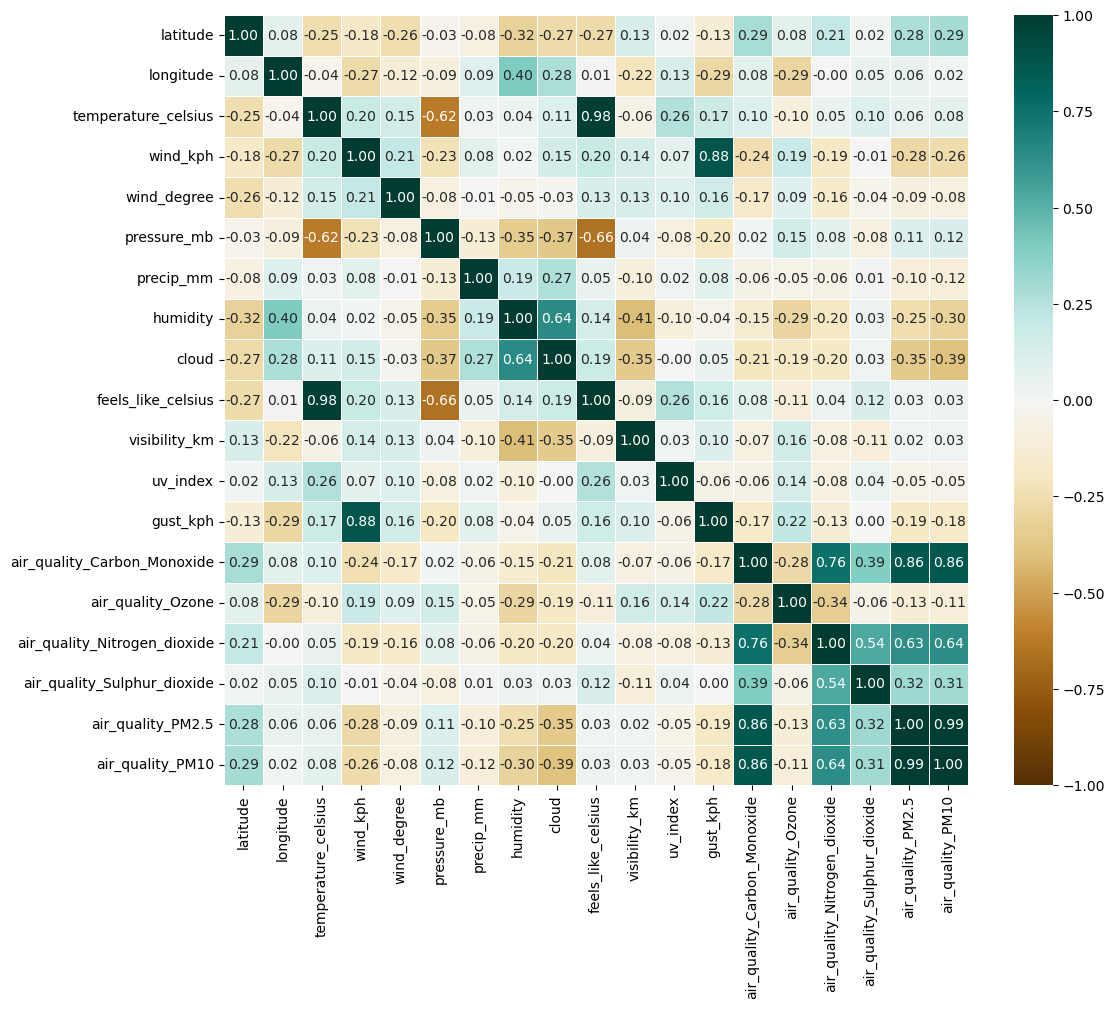

In [10]:
# Calculate correlation matrix
corr_matrix = my_df.corr()

# Set figure size
plt.figure(figsize=(12, 10))  # Adjust the values to your preference

# Create the heatmap with numbers
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG', annot_kws={"size": 10}, linewidths=0.5)

# Show the plot
plt.show()


##### 1. From the above correlation heat map we can see that there is a strong positive correlation of air quality index with the index values of other toxic gases. 
##### 2. We can also see that the other meteorogical variables like wind speed,precipitation,humidity,cloud coverage,uv index,gust,air quality ozone have slightly negetive and very weak correlation.
##### 3. Temperature and pressure have positive and weak correlation with the Air quality index

##### As the index AQI2.5 is the most widely considered value for air quality determination, we are consirdering this as our target variable of our model, where we will be predicting the Air quality index2.5 value with the other independent variables which include the various meteorogical variables and toxic gas concentration level index. 

##### AQI PM10 column is dropped to avoid the multicollinearity, where independent varlables are highly correlated, can complicate the Interpretation individual variable effects and result in unstable coefficient estimates.

### Frequency of PM2.5 AQI value in the given Dataset

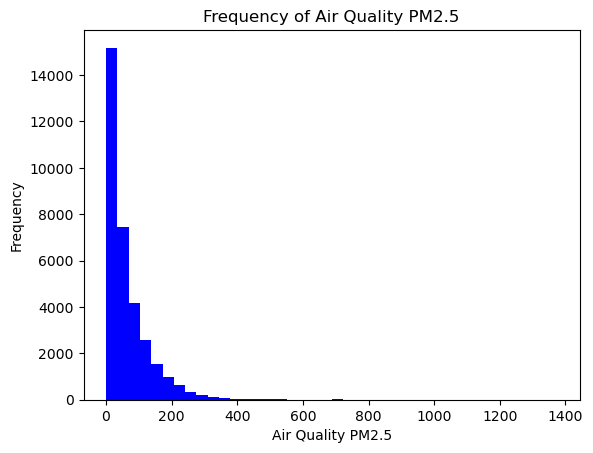

In [11]:
plt.hist(my_df['air_quality_PM2.5'], bins=40, color = "blue")
plt.xlabel('Air Quality PM2.5')
plt.ylabel('Frequency')
plt.title('Frequency of Air Quality PM2.5')
plt.show()   

##### The above histogram plot shows that the data is right skewed.

### Finding the Mean, Standard Deviation, Minimum, Maximum and Quartiles in the Air quality PM2.5 column

In [12]:
my_df['air_quality_PM2.5'].describe()

count    33369.000000
mean        63.063601
std         70.459339
min          0.500000
25%         14.800000
50%         40.600000
75%         86.900000
max       1374.800000
Name: air_quality_PM2.5, dtype: float64

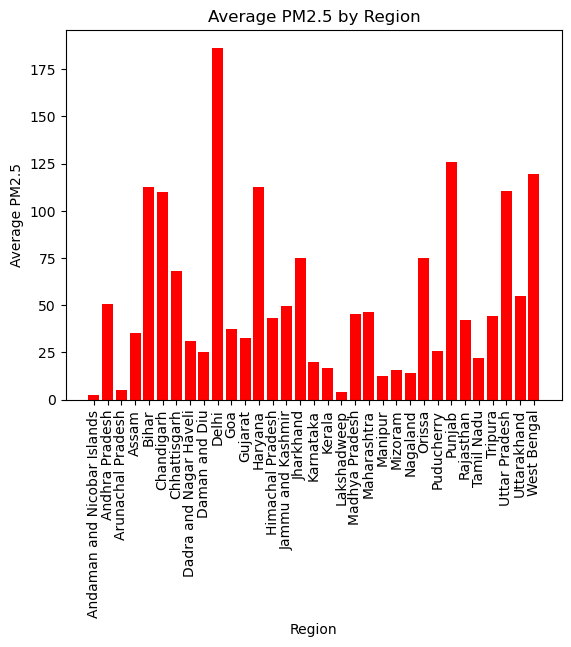

In [13]:
# Calculate the average PM2.5 by region
average_PM25_by_region = my_df.groupby('region')['air_quality_PM2.5'].mean().reset_index()

# Create a bar graph
fig, ax = plt.subplots()
ax.bar(average_PM25_by_region['region'], average_PM25_by_region['air_quality_PM2.5'],color="red")

# Setting labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Average PM2.5')
ax.set_title('Average PM2.5 by Region')

plt.xticks(rotation=90)
plt.show()

##### The above plot shows the average AQI PM2.5  across different regions in India with Delhi reporting the highest average AQI then followed by punjab, haryana and uttar pradesh

### Conversion of the categorical data into numerical data

In [14]:
label_encoder = preprocessing.LabelEncoder() 
my_df['condition_text']= label_encoder.fit_transform(my_df['condition_text']) 
my_df['wind_direction']= label_encoder.fit_transform(my_df['wind_direction'])
my_df['moon_phase']= label_encoder.fit_transform(my_df['moon_phase'])
my_df['region']= label_encoder.fit_transform(my_df['region'])
my_df


,region,latitude,longitude,last_updated,time,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,...,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,moon_phase
0,32,22.07,88.44,20-Oct,02:30:00,23.3,0,10.1,16,5,...,10.0,1,21.2,13565.1,0.0,113.8,83.0,1374.8,1498.0,6
1,32,22.07,88.44,19-Oct,02:30:00,26.0,11,9.0,10,3,...,2.8,1,17.0,11749.3,0.0,67.2,68.7,1282.6,1422.5,6
2,32,22.07,88.44,13-Oct,02:45:00,25.3,0,6.5,330,6,...,10.0,1,13.6,8331.3,0.0,36.3,49.1,992.8,1159.5,4
3,32,22.38,88.27,24-Oct,02:15:00,25.0,11,11.2,20,5,...,3.0,1,18.9,9719.9,0.0,55.5,59.6,932.0,1082.4,7
4,32,22.57,88.37,24-Oct,02:15:00,25.0,11,11.2,20,5,...,3.0,1,18.9,9719.9,0.0,55.5,59.6,932.0,1082.4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33364,16,13.00,76.10,30-Sep,03:15:00,18.9,24,13.0,219,12,...,10.0,1,18.7,191.9,21.5,1.3,0.1,0.5,0.7,1
33365,16,13.00,76.10,01-Oct,04:00:00,19.6,24,18.4,238,15,...,10.0,1,26.6,205.3,20.2,1.2,0.2,0.5,0.7,5
33366,17,8.88,76.59,05-Oct,03:00:00,25.4,24,3.6,185,8,...,10.0,1,1.1,213.6,24.3,1.1,0.3,0.5,0.9,5
33367,18,10.57,72.62,16-Oct,02:30:00,27.3,24,11.5,92,0,...,9.0,1,16.6,210.3,37.2,0.4,0.1,0.5,0.8,6


##### As we have more than two factors in each categorical variable we are using label encoder rather than dummies to convert our categorical data into numerical data

### Time series Plot of AQI data

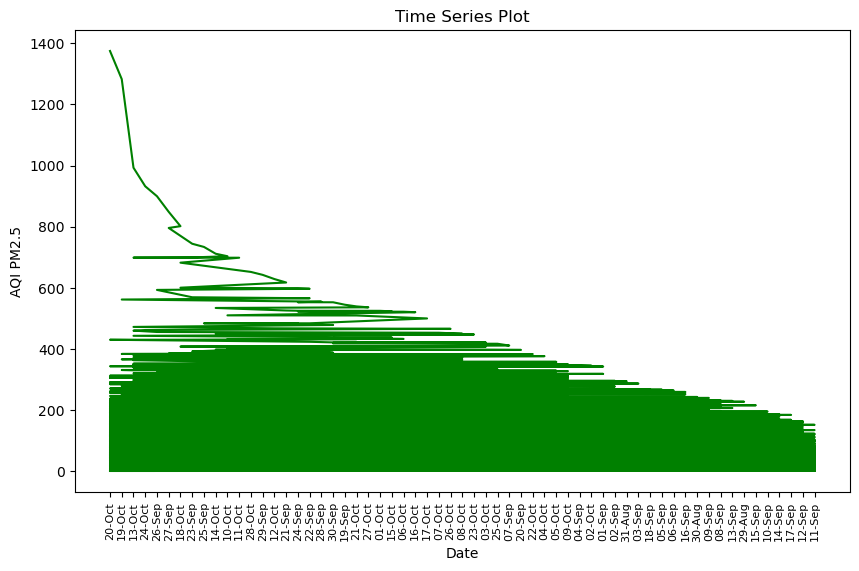

In [42]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the time series
plt.plot(my_df['last_updated'], my_df['air_quality_PM2.5'], label='Value', color='green')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('AQI PM2.5')
plt.title('Time Series Plot')
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
# Show the plot
plt.show()


##### The above time series plot indicates that there is an overall rising trend in AQI from August to October.
##### Typically the AQI value rises in India with the start of winter season and as our data is moving towards the winter season we can clearly observe the overall rising trend in AQI.

### Splitting the data into training and testing sets using the train_test_split function

In [16]:
X = my_df.drop(['air_quality_PM2.5','time','last_updated','air_quality_PM10'], axis=1)
y = my_df['air_quality_PM2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

##### 1. The independent variables are plotted on the X-Axis, while the dependent variables are plotted on the Y-Axis. Since PM2.5 is our dependent variable, we should exclude it from the DataFrame. The DataFrame 'X' contains all columns except PM2.5,PM10,time and last updated dat. We encode the 'Air Quality PM2.5' column as 'y', as it is our target variable.

##### 2. We allocate 20% of the data for testing, reserving the remaining 80% for training the model. The random sample is employed to manage how the randomization is carried out.

### Creating the Linear Regression Model and Training it

In [17]:
mod = LinearRegression()
mod.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = mod.predict(X_test)

In [19]:
cdf = pd.DataFrame(mod.coef_, X.columns, columns=['Coefficients'])
cdf

,Coefficients
region,0.091412
latitude,-0.200543
longitude,0.857195
temperature_celsius,3.687693
condition_text,-0.259083
wind_kph,-1.118008
wind_degree,0.037404
wind_direction,-0.182076
pressure_mb,0.847006
precip_mm,-0.235842


##### The above results shows that temperature, pressure , humidity, carbon monoxide toxicity and ozone airquality are having great impact in increase of air quality index value, For every 1 degree rise in temperature the air quality rises by 3.68

##### Above codes is used for comparing the results of Target variable with the values in the Testing set.

### Calculating the Root Mean Squared Error between Actual vs Predicted Target Values

In [22]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### Calculating the R Squared score between Actual vs Predicted Target Values

In [23]:
r2 = r2_score(y_test, y_pred)

In [24]:
residuals = y_test - y_pred
residuals

15443   -11.558512
16370    -5.921337
4415     73.414041
23917   -31.200767
11714   -26.158338
           ...    
7672      9.385627
21996    11.265343
4233     47.638556
12996     1.113274
24192   -38.748745
Name: air_quality_PM2.5, Length: 6674, dtype: float64

### Creating the Residual Plot to find the relation between Residuals and Predicted Values

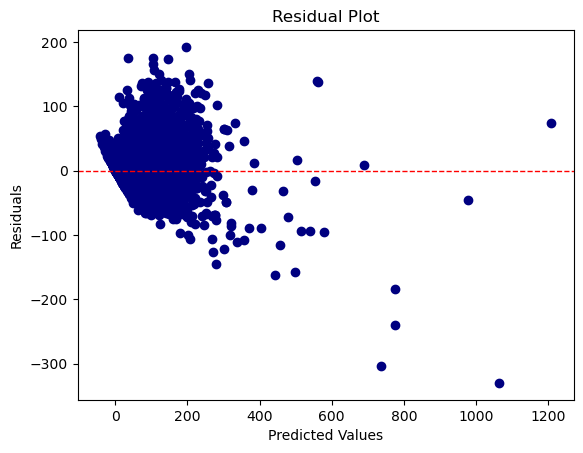

In [25]:
# Scatter plot of predicted values vs. residuals
plt.scatter(y_pred, residuals, color='navy')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Add horizontal and vertical lines at the origin
plt.axhline(0, color='red', linestyle='--', linewidth=1)
#plt.axvline(0, color='red', linestyle='--', linewidth=1)

# Display the plot
plt.show()


##### If we look at the graph the residuals are closer at lower air quality index and are far away at higher air quality index. A funnel shape can be observed in the plot which means there is absence of equality of variances assumption and it follows hetroscedasticity.

### Creating a Scatter Plot to find the relation between Test and Predicted Values

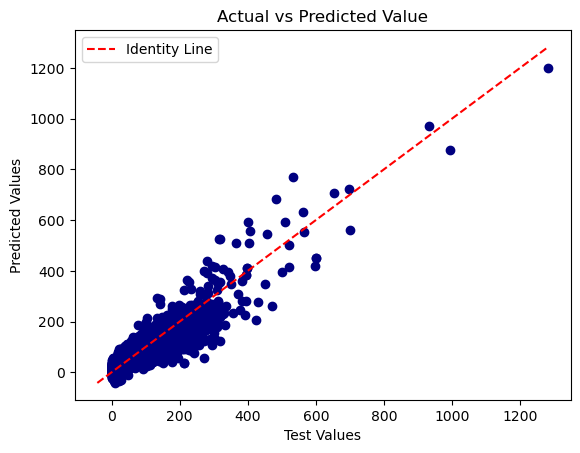

In [535]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, color='navy')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Value')

# Add the identity line
x_line = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 100)
y_line = x_line
plt.plot(x_line, y_line, color='red', linestyle='--', label='Identity Line')

# Show legend
plt.legend()

# Display the plot
plt.show()


##### If we look at the above plot the predicted values and real values have linear relationship.

### Printing the RSME and R Squared Values to know whether selected Model is a good fit or not

In [27]:
print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

RMSE: 30.75
R-squared: 0.80


##### An R² value of 0.81 suggests that approximately 81% of the changes in the dependent variable (y) can be explained by the independent variable(s) in the linear regression model (X). This implies that the linear regression model could potentially be a suitable fit for the data.

### Finding the Coefficients and Intercepts of the Model.

In [28]:
coeff_org = mod.coef_

inter_org = mod.intercept_

print("Coefficients:", coeff_org)
print("Intercept:", inter_org)

Coefficients: [ 9.14124098e-02 -2.00543290e-01  8.57195283e-01  3.68769273e+00
 -2.59083332e-01 -1.11800754e+00  3.74040600e-02 -1.82075627e-01
  8.47005869e-01 -2.35841686e-01  2.56859472e-02 -2.25517079e-01
 -2.21579047e+00  1.08033903e+00 -1.58691235e+00  9.35307688e-02
  1.04307292e-01  3.20464612e-01 -1.38854411e-01  8.08236166e-04
 -3.96036687e-01]
Intercept: -957.4113819487609


### Importing the Required Libraries:

In [29]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

### Considering the Different regression algorithms and created a list to store all the Models.

In [30]:
models = [Lasso(), Ridge(), LinearRegression(), DecisionTreeRegressor(max_depth=4), RandomForestRegressor(n_estimators=100, max_depth=5)]

### Splitting the data into training and testing sets using the train_test_split function

In [31]:
X = my_df.drop(['air_quality_PM2.5','time','last_updated','air_quality_PM10'], axis=1)
y = my_df['air_quality_PM2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)


In [32]:
for mod_1 in models:
    mod_1.fit(X_train, y_train)
    y_pred_2 = mod_1.predict(X_test)

> Performing the K fold cross validation on the Models 

In [33]:
kf = KFold(n_splits=5, shuffle=True, random_state=35)
for mod_2 in models:
    scores = cross_val_score(mod_2, X, y, cv=kf)
    print(scores)

[0.80233007 0.81195689 0.76675816 0.79512484 0.80566964]
[0.80330563 0.8136422  0.76858629 0.79644254 0.80644097]
[0.80330563 0.81364223 0.76858635 0.79644253 0.80644086]
[0.78097515 0.77687764 0.74094003 0.77350379 0.78965603]
[0.82520885 0.82388355 0.78920804 0.82663113 0.82752387]


#### The Random Forest Regression model has a higher average performance compared to other models. This indicates that, based on this dataset, Random Forest Regression is the most suitable model. It's important to note that using K-fold cross-validation offers a more dependable evaluation of a model's performance than a single train-test split. This method aids in the selection of the best model from a set of potential candidates by assessing their performance on the same data.

> Selecting the best-performing model in the selected models based on evaluation metrics

In [34]:
b_mod = None
b_sco = float('-inf')

for mod_3 in models:
    mod_3.fit(X_train, y_train)
    y_pred_3 = mod_3.predict(X_test)
    sco = r2_score(y_test, y_pred_3)  # Replace with your metric
    print(sco)
    
    if sco> b_sco:
        b_sco = sco
        b_mod = mod_3


0.8023300729367164
0.8033056279415979
0.8033056309509974
0.7809751549128913
0.8256534192761298


##### Above output shows all the Predicted values and R-Squared values for each model.

### Printing the Best Model and its R-Squared score in the selected Models.

In [35]:
print(f"Best Model: {b_mod}")
print(f"Best Score: {b_sco}")

Best Model: RandomForestRegressor(max_depth=5)
Best Score: 0.8256534192761298


In [36]:
models

[Lasso(),
 Ridge(),
 LinearRegression(),
 DecisionTreeRegressor(max_depth=4),
 RandomForestRegressor(max_depth=5)]

> Calculating the Coeffifcients and Interecept of Lasso Model.

In [37]:
coeff_LA = models[0].coef_

inter_LA = models[0].intercept_

print("Coefficients:", coeff_LA)
print("Intercept:", inter_LA)

Coefficients: [ 0.07747505 -0.21954859  0.76215942  0.71114438 -0.28849439 -0.93669922
  0.0354483  -0.07817976  0.65509973 -0.         -0.04935755 -0.24042292
 -0.          0.80671236 -0.84362435  0.          0.1046255   0.30053414
 -0.14893318 -0.01164319 -0.02099045]
Intercept: -735.7999245387896


> Calculating the Coeffifcients and Interecept of Ridge Model.

In [38]:
coeff_Ri = models[1].coef_

inter_Ri = models[1].intercept_

print("Coefficients:", coeff_Ri)
print("Intercept:", inter_Ri)

Coefficients: [ 9.14125503e-02 -2.00550549e-01  8.57190421e-01  3.68732317e+00
 -2.59087007e-01 -1.11800380e+00  3.74040626e-02 -1.82071169e-01
  8.46993767e-01 -2.35842189e-01  2.56756187e-02 -2.25517853e-01
 -2.21550864e+00  1.08032196e+00 -1.58686534e+00  9.35300297e-02
  1.04307362e-01  3.20462414e-01 -1.38858361e-01  8.06874445e-04
 -3.96029775e-01]
Intercept: -957.3961640876254


> Calculating the Coeffifcients and Interecept of Linear Regression Model.

In [39]:
coeff_LR = models[2].coef_

inter_LR = models[2].intercept_

print("Coefficients:", coeff_LR)
print("Intercept:", inter_LR)

Coefficients: [ 9.14124098e-02 -2.00543290e-01  8.57195283e-01  3.68769273e+00
 -2.59083332e-01 -1.11800754e+00  3.74040600e-02 -1.82075627e-01
  8.47005869e-01 -2.35841686e-01  2.56859472e-02 -2.25517079e-01
 -2.21579047e+00  1.08033903e+00 -1.58691235e+00  9.35307688e-02
  1.04307292e-01  3.20464612e-01 -1.38854411e-01  8.08236166e-04
 -3.96036687e-01]
Intercept: -957.4113819487609


In [40]:
importances = models[3].feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
region: 0.0000
latitude: 0.0000
longitude: 0.0000
temperature_celsius: 0.0025
condition_text: 0.0000
wind_kph: 0.0000
wind_degree: 0.0000
wind_direction: 0.0000
pressure_mb: 0.0000
precip_mm: 0.0000
humidity: 0.0000
cloud: 0.0344
feels_like_celsius: 0.0000
visibility_km: 0.0000
uv_index: 0.0000
gust_kph: 0.0000
air_quality_Carbon_Monoxide: 0.9631
air_quality_Ozone: 0.0000
air_quality_Nitrogen_dioxide: 0.0000
air_quality_Sulphur_dioxide: 0.0000
moon_phase: 0.0000


In [41]:
importances = models[4].feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
region: 0.0011
latitude: 0.0079
longitude: 0.0067
temperature_celsius: 0.0007
condition_text: 0.0002
wind_kph: 0.0002
wind_degree: 0.0012
wind_direction: 0.0002
pressure_mb: 0.0019
precip_mm: 0.0000
humidity: 0.0089
cloud: 0.0263
feels_like_celsius: 0.0003
visibility_km: 0.0002
uv_index: 0.0000
gust_kph: 0.0011
air_quality_Carbon_Monoxide: 0.9328
air_quality_Ozone: 0.0081
air_quality_Nitrogen_dioxide: 0.0021
air_quality_Sulphur_dioxide: 0.0001
moon_phase: 0.0000
